## Introduction for exercise

### Recording the data

As mentioned before, there happens about billion particle collision in the CMS in one second and it is impossible to record all data from these collisions. Therefore, right after a collision trigger system will decide whether the collision has been potentially interesting or not. Non-interesting collision will not be recorded. This multi-staged triggering process reduces the amount of recorded collisions from billion to about thousand collisions per second.

Data collected from collisions will be saved to AOD (Analysis Object Data) files that can be opened with the ROOT program (https://root.cern.ch/). Structures of the files are very complicated so those can't be handled for example in simple data tables.

In this exercise a CSV (comma-separated-values) file format is used instead of the AOD format. A CSV file is a regular text file that contains different values separated with commas. These files can be easily read and handled with the Python programming language.

### Indirect detection of particles

Not every particle can be detected directly with the CMS or other particle detectors. Often, processes of interest are short-lived. These processes can be detected indirectly.

For example the Z boson, the particle that mediates weak interaction, can't be detected directly with the CMS since the lifetime of the Z is very short.
That means that the Z boson will decay before it even reaches the silicon detector of the CMS.

#### How do we detect Z boson?

Indirect way of detecting Z boson is by detecting particles that originate from the decay of the Z boson.
Z boson has many decay channel, but in todays' exercise we will consider only decay of the Z boson to the muon and antimuon pair.

Important note is that the events with detected muon and antimuon pair are not all originating from Z boson. Therefore, different selections need to be applied in order to reconstruct Z boson. 
What selection would you use?

## The invariant mass

The mass of the Z boson can be determined with the help of a concept called _invariant mass_.

Let's observe a situation where a particle with mass $M$ and energy $E$ decays to two particles with masses $m_1$ and $m_2$, and energies $E_1$ and $E_2$. Energy $E$ and momentum $\vec{p}$ is concerved in the decay process so $E = E_1 +E_2$ and $\vec{p} = \vec{p}_1+ \vec{p}_2$.

Particles will obey the relativistic dispersion relation:

$$
Mc^2 = \sqrt{E^2 - c^2\vec{p}^2}.
$$

And with the concervation of energy and momentum this can be shown as

$$
Mc^2 = \sqrt{(E_1+E_2)^2 - c^2(\vec{p_1} + \vec{p_2})^2}
$$
$$
=\sqrt{E_1^2+2E_1E_2+E_2^2 -c^2\vec{p_1}^2-2c^2\vec{p_1}\cdot\vec{p_2}-c^2\vec{p_2}^2}
$$
$$
=\sqrt{2E_1E_2 - 2c^2 |\vec{p_1}||\vec{p_2}|\cos(\theta)+m_1^2c^4+m_2^2c^4}. \qquad (1)
$$

The relativistic dispersion relation can be brought to the following format

$$
M^2c^4 = E^2 - c^2\vec{p}^2
$$
$$
E = \sqrt{c^2\vec{p}^2 + M^2c^4},
$$

from where by setting $c = 1$ (very common in particle physics) and by assuming masses of the particles very small compared to momenta, it is possible to get the following:

$$
E = \sqrt{\vec{p}^2 + M^2} = |\vec{p}|\sqrt{1+\frac{M^2}{\vec{p}^2}}
\stackrel{M<<|\vec{p}|}{\longrightarrow}|\vec{p}|.
$$

By applying the result $E = |\vec{p}|$ derived above and the setting $c=1$ to the equation (1), it can be reduced to the format

$$
M=\sqrt{2E_1E_2(1-\cos(\theta))},
$$

where $\theta$ is the angle between the momentum vector of the particles. With this equation it is possible to calculate the invariant mass for the particle pair if energies of the particles and the angle $\theta$ is known.

In experimental particle physics the equation for the invariant mass is often in the form

$$
M = \sqrt{2p_{T1}p_{T2}( \cosh(\eta_1-\eta_2)-\cos(\phi_1-\phi_2) )}, \qquad (2)
$$





## Hands on!

This exercise uses data that contains collisions where two muons have been detected (among with other particles). 
By computing the invariant mass of dimuon pair, we will try to find Z boson!

To indentify Z boson the invariant mass for two muons is calculaetd for the big amount of collision events. Then a histogram is made from the calcuated values. The histogram shows how many invariant mass values will be in each bin of the histogram.

If a peak is formed in the histogram, it can prove that in the collision events there has been a particle which mass corresponds to the peak. 


### Getting data

In the code below Python programming language will be used to get and analyse data.
Python is widely used in scientific community for computing, modifying and analyzing data, and for these purposes Python is greatly optimized. Part of Python is to use different kind of modules, which are files containing definitions (functions) and statements. 

You can run the code cell by clicking it active and then pressing CTRL + ENTER


In [1]:
# Import the needed modules. Pandas is for the data-analysis, numpy for scientific calculation 
# and matplotlib for making plots.
# Name these to "pd", "np" and "plt".

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Open data from CMS-experiment is in .csv files. For a computer, this kind of data is easy to read using pandas-module. Saving the read file in a variable makes the variable type dataframe. 

In [2]:
# Create a new DataFrame structure from the file "Zmumu_Run2011A.csv". Name it as "dataset".
dataset = pd.read_csv('http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv')

We can check the content that we saved to the variable _dataset_ by printing the 5 first rows with the following code. This can be done with the function variablename.head():

In [3]:
# Print first 5 rows
dataset.head() # to be removed

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


#### Can you identify the columns of the table? What are they corresponding to?

### Calculating invariant mass

The invariant mass of dimuon pair is computed using formula (2).

In the calculation below we will use the _numpy_ module which was named as _np_ in the first code cell. With _numpy_ it is possible to use mathematical commands like _sqrt_ and _cosh_ by calling first the name of the module (_np_) and then the command separated by a dot. So for example the square root could be called by writing _np.sqrt( )_.

The _pt1_, _pt2_, _eta1_, _eta2_, _phi1_ and _phi2_ refer to the columns of the data. In the code it has to be told from where the values will be taken. So for example if you want to get the column _pt1_, you have to write _dataset.pt1_ in the code.

Now we are ready to calculate the values of the invariant masses for the different events!

In [4]:
# compute invariant mass 
#to be removed

invariant_mass = np.sqrt(2*dataset.pt1*dataset.pt2*(np.cosh(dataset.eta1-dataset.eta2) - np.cos(dataset.phi1-dataset.phi2)))

After the calculation we can check which values were saved in the variable _invariant_\__mass_ by printing the content of the variable:

In [5]:
print(invariant_mass)

0        17.491141
1        11.551450
2         9.160949
3        12.475563
4        14.314328
           ...    
99995    11.204075
99996    14.580022
99997    29.841969
99998    20.205780
99999     9.371710
Length: 100000, dtype: float64


Let's add the column of invariant masses to the table *dataset*. First we need to know the types

In [6]:
print("dataset is a %s" %type(dataset))
print("invariant_mass is a %s" %type(invariant_mass))

dataset is a <class 'pandas.core.frame.DataFrame'>
invariant_mass is a <class 'pandas.core.series.Series'>


Since the types are different, we have to convert *invariant_mass* into a frame. Let's name it *M*. Then we can combine them into one table structure of *all_data*.

In [7]:
M = invariant_mass.to_frame('M')

In [8]:
all_data = dataset.merge(M, left_index=True, right_index=True)
all_data.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M_x,M_y
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922,17.491141
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534,11.551450
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636,9.160949
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774,12.475563
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159,14.314328


### Plotting histogram

Histograms can be created with Python with the matplotlib.pyplot module that was imported before and named as plt. With the function plt.hist() it is possible to create a histogram by giving different parameters inside the brackets. 
Now only the first three of the parameters are needed: a variable from which values the histogram is created (x), number of bins (bins) and the lower and upper range of the bins (range).

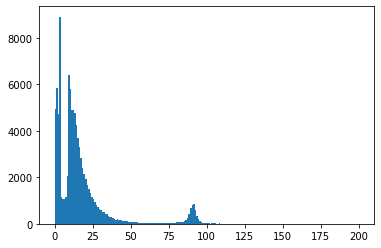

In [14]:
# create histogram
plt.hist(invariant_mass, bins=200, range=(0,200)) #remove

# We can name the axes and the title and show the histogram.
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.show()

#### Describe the histogram. What information you can get from it? How many peaks do you see?


### The effect of pseudorapidity to the resolution of the measurement

In this section it will be shortly studied how does pseudorapidities of muons that are detected in the CMS detector affect to the mass distribution.
As explained before, pseudorapidity $\eta$ describes an angle of which the detected particle has differed from the particle beam (z-axis).

For doing that, two different histograms will be made: an one with only muon pairs with small pseudorapidities and an one with great pseduorapidities.
The histograms will be made with the familiar method from the earlier part of this exercise.

_Note : The division of data set example with variables a and b, satisfying condition c [(example.a > c) & (example.b > c)]_

In [9]:
#import modules needed for performing this study

#imported data and saved to the variable "dataset".


# Set the conditions to large and small etas. 
selection_large = 1.52 #remove
selection_small = 0.45 #remove

# Create two DataFrames. Select to "large_etas" events where the pseudorapidities
# of the both muons are larger than "selection_large". Select to "small_etas" events where
# the pseudorapidities of the both muons are smaller than "selection_small".
# Note: remember what is the range for pseudorapidity

large_etas = dataset[(np.absolute(dataset.eta1) > cond1) & (np.absolute(dataset.eta2) > cond1)]#remove
small_etas = dataset[(np.absolute(dataset.eta1) < cond2) & (np.absolute(dataset.eta2) < cond2)]#remove


print('The amount of all events = %d' % len(dataset))
print('The amount of events where the pseudorapidity of both muons has been large = %d' %len(large_etas))
print('The amount of events where the pseudorapidity of both muons has been small = %d' %len(small_etas))




The amount of all events = 100000
The amount of events where the pseudorapidity of both muons has been large = 8002
The amount of events where the pseudorapidity of both muons has been small = 9119


### Plot histograms


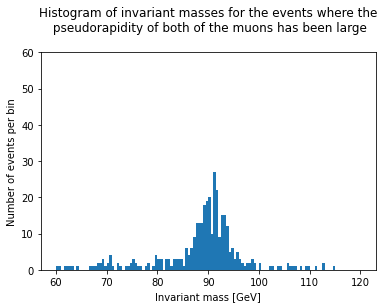

In [10]:
# Let's differ the invariant masses of the large and small pseudorapidity
# events for making the histograms.

inv_mass_great = large_etas['M']
inv_mass_small = small_etas['M']

# Let's use the matplotlib.pyplot module to create a custom size
# figure where the two histograms will be plotted.

f = plt.figure(1)
f.set_figheight(15)
f.set_figwidth(15)
plt.subplot(211)
plt.hist(inv_mass_great, bins=120, range=(60,120))
plt.ylabel('great etas, number of events', fontsize=20)
plt.subplot(212)
plt.hist(inv_mass_small, bins=120, range=(60,120))
plt.ylabel('small etas, number of events', fontsize=20)
plt.xlabel('invariant mass [GeV]', fontsize=20)
plt.show()

#### Compare the created histograms. Is the mass distribution affected by pseudorapidity of muons? 
#### If yes, how? What could possibly explain your observation?